In [29]:
import xarray as xr
from pathlib import Path

In [61]:
file = Path('../hfradar/data/totals/oi/nc/hourly/RU_MARA_20190101T000000Z.nc')



ds = xr.open_dataset(file)
ds


<xarray.Dataset>
Dimensions:                (lat: 187, lon: 196, parameters: 8, time: 1, z: 1)
Coordinates:
  * lon                    (lon) float32 -77.90598 -77.84791 ... -66.581314
  * lat                    (lat) float32 33.81852 33.87246 ... 43.79742 43.85136
  * z                      (z) float32 0.0
  * time                   (time) datetime64[ns] 2019-01-01
Dimensions without coordinates: parameters
Data variables:
    u                      (time, z, lat, lon) float32 ...
    v                      (time, z, lat, lon) float32 ...
    u_err                  (time, z, lat, lon) float32 ...
    v_err                  (time, z, lat, lon) float32 ...
    uv_covariance          (time, z, lat, lon) float32 ...
    num_radials            (time, z, lat, lon) float64 ...
    processing_parameters  (parameters) float64 ...
    crs                    float64 ...
    instrument             float64 ...
Attributes:
    ncei_template_version:         NCEI_NetCDF_Grid_Template_v2.0
    publisher_name:                NOAA National Centers for Environmental In...
    publisher_email:               ncei.info@noaa.gov
    publisher_url:                 www.ncei.noaa.gov
    title:                         MARACOOS 6km Sea Surface Currents
    summary:                       Optimally Interpolated Total Vectors calcu...
    keywords:                      Environmental Advisories > Marine Advisori...
    Conventions:                   CF-1.6, ACDD-1.3
    naming_authority:              edu.rutgers.marine.rucool
    history:                       Hourly codar radial data combined into one...
    source:                        CODAR SeaSonde Surface Current Mapping Device
    processing_level:              Level 3
    comment:                       Network maintained by MARACOOS. For oi_* g...
    acknowledgment:                This data is provided by the Mid-Atlantic ...
    standard_name_vocabulary:      CF Standard Name Table v41
    date_created:                  20191022T140606Z
    creator_name:                  Michael Smith
    creator_email:                 michaesm@marine.rutgers.edu
    creator_url:                   rucool.marine.rutgers.edu
    institution:                   Center for Ocean Observing and Leadership,...
    project:                       Mid-Atlantic Regional Association Coastal ...
    geospatial_lat_min:            33.81852
    geospatial_lat_max:            43.85136
    geospatial_lon_min:            -77.90598
    geospatial_lon_max:            -66.581314
    geospatial_vertical_min:       0.0
    geospatial_vertical_max:       0.0
    geospatial_vertical_positive:  down
    time_coverage_start:           20190101T000000Z
    time_coverage_end:             20190101T000000Z
    sea_name:                      Mid-Atlantic Bight
    creator_type:                  person
    creator_institution:           Rutgers University
    contributor_name:              Scott Glenn, Josh Kohut, Hugh Roarty, Etha...
    contributor_role:              Principal Investigator, Principal Investig...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    date_modified:                 20191022T140606Z
    date_issued:                   20191022T140606Z
    date_metadata_modified:        20191022T140606Z
    keywords_vocabulary:           GCMD Science Keywords
    platform:                      MARACOOS HF Radar 5MHz Network
    instrument:                    Network includes CODAR sites AMAG, ASSA, B...
    cdm_data_type:                 Grid
    references:                    http://maracoos.org/node/146 https://rucoo...
    method:                        Optimal Interpolation

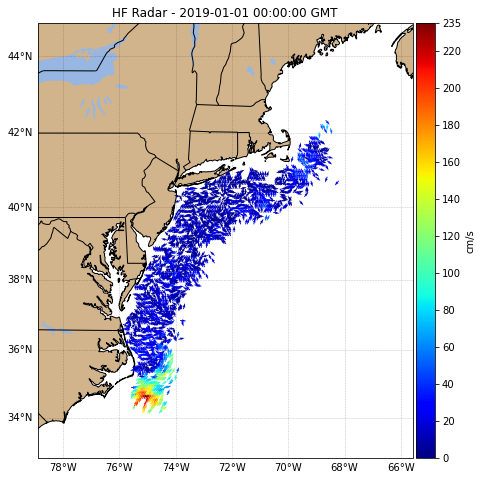

In [64]:
from hfradar.plotting.plot_nc import plot_totals

plot_totals(ds)